In [1]:
from specialist_data import manager
from models.specialist import Specialist
from models.stats.model_stats import ModelStats

batch_size = 100
interval = batch_size/1000

In [2]:
# Run specialist in all seeds
for seed, transformed in manager.transformed.items():
    specialist = Specialist(transformed, seed)
    # specialist.evolve_process(interval=interval, max_limit=35)

In [6]:
seeds = [seed for seed in manager.transformed.keys()]
batch_sizes = [50, 100, 500]

stats = ModelStats(seeds=seeds, batch_sizes=batch_sizes)
stats.get_data()

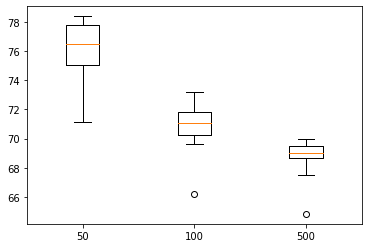

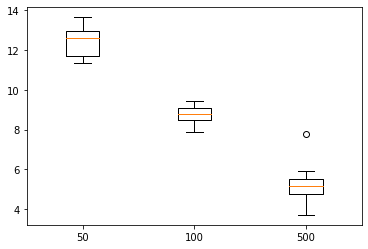

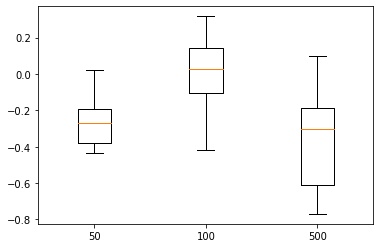

In [7]:
stats.compare_batches_metric('mean')
stats.compare_batches_metric('std')
stats.compare_batches_metric('skew')

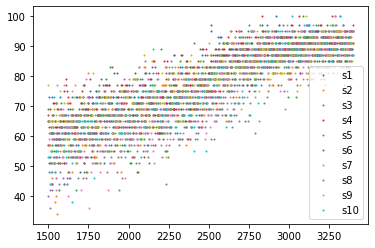

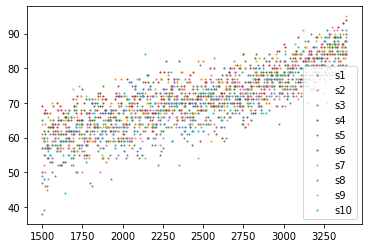

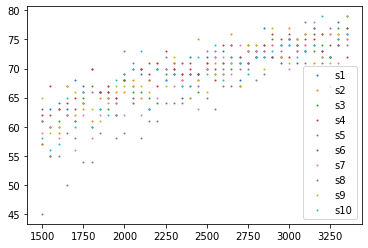

In [5]:
for batch in stats.batch_sizes:
    stats.plot_seeds_scatter(batch)